In [2]:
from utils import *

In /opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/en

(2, 10)


Read in mapped reactions:

In [3]:
bkms = pd.read_csv('../../data/processed_bkms_database/bkms-mapped.txt', sep = '\t')
bkms['mapped_smiles'] = bkms[' ']
bkms = bkms.drop(columns=[' '])

# mapped_metacyc = pd.read_csv('../../MetaCyc_Data/tier1/25.0/data/atom-mappings-smiles.dat', sep = '\t', header = None, )
# mapped_metacyc.columns = ['Reaction_ID_MetaCyc', 'mapped_metacyc_smiles']

In [4]:
mapped_metacyc.merge(bkms, on='Reaction_ID_MetaCyc', how='right')

NameError: name 'mapped_metacyc' is not defined

In [5]:
#number of unmapped smiles
(bkms['mapped_smiles'] == ' ').sum()

251

In [6]:
bkms

,Unnamed: 0,ID,EC_Number,Recommended_Name,Reaction,Reaction_ID_BRENDA,Reaction_ID_KEGG,Reaction_ID_MetaCyc,Reaction_ID_SABIO_RK,BRENDA_Pathway_Name,...,MetaCyc_Pathway_Name,Stoichiometry_Check,Missing_Substrate,Missing_Product,Commentary_KEGG,Commentary_MetaCyc,Remark,smiles,num products,mapped_smiles
0,0,1,5.3.3.3,vinylacetyl-CoA DELTA-isomerase,vinylacetyl-CoA = (E)-but-2-enoyl-CoA,BR1,R03031,VINYLACETYL-COA-DELTA-ISOMERASE-RXN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,natural substrates,C=CCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=...,1,[O:1]=[C:2]([S:3][CH2:4][CH2:5][NH:6][C:7](=[...
1,1,2,6.3.2.1,pantoate-beta-alanine ligase (AMP-forming),ATP + (R)-pantoate + beta-alanine = AMP + diph...,BR101,R02473,PANTOATE-BETA-ALANINE-LIG-RXN,2406,pantothenate biosynthesis,...,phosphopantothenate biosynthesis I,NaN,NaN,NaN,NaN,NaN,natural substrates,CC(C)(CO)[C@@H](O)C(=O)O.NCCC(=O)O>>CC(C)(CO)[...,1,[O:1]=[C:2]([OH:16])[C@H:3]([OH:4])[C:5]([CH3...
2,2,3,6.3.2.10,UDP-N-acetylmuramoyl-tripeptide-D-alanyl-D-ala...,ATP + UDP-N-acetylmuramoyl-L-alanyl-gamma-D-gl...,BR102,R04573,6.3.2.10-RXN,4244,peptidoglycan biosynthesis,...,UDP-N-acetylmuramoyl-pentapeptide biosynthesis...,NaN,NaN,NaN,NaN,NaN,natural substrates,CC(=O)N[C@H]1[C@@H](OP(=O)(O)OP(=O)(O)OC[C@H]2...,1,[O:1]=[C:2]([OH:78])[C@@H:3]([NH:4][C:5](=[O:...
3,3,4,6.3.2.4,D-Alanine-D-alanine ligase,ATP + UDP-N-acetylmuramoyl-L-alanyl-gamma-D-gl...,BR102,R04573,6.3.2.10-RXN,4244,peptidoglycan biosynthesis,...,UDP-N-acetylmuramoyl-pentapeptide biosynthesis...,NaN,NaN,NaN,NaN,NaN,natural substrates,CC(=O)N[C@H]1[C@@H](OP(=O)(O)OP(=O)(O)OC[C@H]2...,1,[O:1]=[C:2]([OH:78])[C@@H:3]([NH:4][C:5](=[O:...
4,4,5,6.3.2.11,carnosine synthase,ATP + L-histidine + beta-alanine = ADP + phosp...,BR103,R01164,CARNOSINE-SYNTHASE-RXN,NaN,NaN,...,carnosine biosynthesis,NaN,NaN,NaN,NaN,NaN,natural substrates,NCCC(=O)O.N[C@@H](Cc1c[nH]cn1)C(=O)O>>NCCC(=O)...,1,[O:1]=[C:2]([OH:3])[C@@H:4]([NH2:5])[CH2:6][c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27105,12026,12027,1.21.99.5,tetrachloroethene reductive dehalogenase,chloroethene + reduced acceptor = ethene + chl...,BS442352,NaN,VCREDCHLOR-RXN,NaN,NaN,...,tetrachloroethene degradation,NaN,NaN,NaN,NaN,NaN,"natural substrates, generic",C=CCl>>C=C.Cl,2,[Cl:1][CH:2]=[CH2:3]>>[CH2:2]=[CH2:3].[ClH:1]
27106,12027,12028,1.21.99.M2,NaN,chloroethene + reduced acceptor = ethene + chl...,BS442352,NaN,VCREDCHLOR-RXN,NaN,NaN,...,tetrachloroethene degradation,NaN,NaN,NaN,NaN,NaN,"natural substrates, generic",C=CCl>>C=C.Cl,2,[Cl:1][CH:2]=[CH2:3]>>[CH2:2]=[CH2:3].[ClH:1]
27107,12028,12029,1.21.3.3,reticuline oxidase,Tetrahydropalmatine + 2 Oxygen + H+ <=> Palmat...,BS442681,R08795,RXN-8699,NaN,NaN,...,palmatine biosynthesis,NaN,NaN,NaN,tetrahydropalmatine oxidase,NaN,natural substrates,COc1cc2c(cc1OC)[C@H]1Cc3ccc(OC)c(OC)c3CN1CC2>>...,1,[O:1]([c:2]1[cH:3][cH:4][c:5]2[c:6]([c:7]1[O:...
27108,12029,12030,1.3.3.8,tetrahydroberberine oxidase,Tetrahydropalmatine + 2 Oxygen + H+ <=> Palmat...,BS442681,R08795,RXN-8699,NaN,NaN,...,palmatine biosynthesis,NaN,NaN,NaN,tetrahydropalmatine oxidase,NaN,natural substrates,COc1cc2c(cc1OC)[C@H]1Cc3ccc(OC)c(OC)c3CN1CC2>>...,1,[O:1]([c:2]1[cH:3][cH:4][c:5]2[c:6]([c:7]1[O:...


In [7]:
reversibles = bkms[bkms['Reaction'].map(lambda x: '<=>' in str(x))].copy()

reversibles.loc[:,'smiles'] = reversibles['smiles'].map(lambda x: flip_reaction(x))
reversibles.loc[:,'mapped_smiles'] = reversibles['mapped_smiles'].map(lambda x: flip_reaction(x))
reversibles.loc[:,'Reaction'] = reversibles['Reaction'].map(lambda x: flip_reaction(x))


reversibles
bkms_plus_rev = bkms.append(reversibles).reset_index()

In [8]:
reversibles

,Unnamed: 0,ID,EC_Number,Recommended_Name,Reaction,Reaction_ID_BRENDA,Reaction_ID_KEGG,Reaction_ID_MetaCyc,Reaction_ID_SABIO_RK,BRENDA_Pathway_Name,...,MetaCyc_Pathway_Name,Stoichiometry_Check,Missing_Substrate,Missing_Product,Commentary_KEGG,Commentary_MetaCyc,Remark,smiles,num products,mapped_smiles
1340,1453,1454,1.1.1.267,1-deoxy-D-xylulose-5-phosphate reductoisomerase,1-Deoxy-D-xylulose 5-phosphate + NADPH + H+ <=...,BR29286,R05688,DXPREDISOM-RXN,5284,isoprenoid biosynthesis,...,methylerythritol phosphate pathway I; methyler...,NaN,NaN,NaN,NaN,NaN,natural substrates,CC(=O)[C@@H](O)[C@H](O)COP(=O)(O)O>>C[C@](O)(C...,1,[OH:3][P:2]([OH:4])(=[O:1])[O:5][CH2:6][C@@H:7...
2133,12422,12423,1.1.1.110,aromatic 2-oxoacid reductase,Indolepyruvate + NADH + H+ <=> (R)-(Indol-3-yl...,BR29176,NaN,INDOLELACTATE-DEHYDROGENASE-RXN,NaN,tryptophan metabolism,...,L-tryptophan degradation XIII (Stickland react...,NaN,NaN,NaN,NaN,NaN,natural substrates,O=C(O)C(=O)Cc1c[nH]c2ccccc12>>O=C(O)[C@H](O)Cc...,1,[O:1]=[C:2]([OH:3])[C:4](=[O:5])[CH2:6][c:7]1[...
2516,12882,12883,2.1.1.89,tetrahydrocolumbamine 2-O-methyltransferase,S-Adenosyl-L-homocysteine + Tetrahydropalmatin...,BR43929,R04077,2.1.1.89-RXN,3808,NaN,...,palmatine biosynthesis,NaN,NaN,NaN,NaN,NaN,natural substrates,COc1cc2c(cc1OC)[C@H]1Cc3ccc(OC)c(OC)c3CN1CC2>>...,1,[c:2]1([cH:3][c:4]2[c:5]([cH:6][c:7]1[O:8][CH3...
2560,12981,12982,2.4.1.70,poly(ribitol-phosphate) alpha-N-acetylglucosam...,n UDP + 4-O-(2-N-Acetyl-alpha-D-glucosaminyl-D...,BR44244,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"natural substrates, polymer",CC(=O)N[C@@H]1[C@H](O[C@@H]2[C@@H](CO)O[C@H](O...,2,[OH:42][CH2:41][C@H:39]([OH:40])[C@H:37]([OH:3...
2709,13204,13205,2.7.8.14,CDP-ribitol ribitolphosphotransferase,4-O-(D-Ribitylphospho)n-di[(2R)-1-glycerophosp...,BR48089,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"natural substrates, polymer",CC(=O)N[C@@H]1[C@H](O[C@@H]2[C@@H](CO)O[C@H](O...,2,[O:1]=[C:2]([NH:3][C@@H:4]1[C@@H:5]([O:6][C@H:...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27080,12001,12002,1.4.3.23,7-chloro-L-tryptophan oxidase,IPA imine + Hydrogen peroxide <=> L-Tryptophan...,BS440306,NaN,RXN-10922,NaN,NaN,...,K-252 biosynthesis; violacein biosynthesis; st...,NaN,NaN,NaN,NaN,NaN,natural substrates,N=C(Cc1c[nH]c2ccccc12)C(=O)O>>N[C@@H](Cc1c[nH]...,1,[O:1]=[C:2]([OH:3])[C:4](=[NH:5])[CH2:6][c:7]1...
27099,12020,12021,1.3.1.116,7beta-hydroxy-3-oxochol-24-oyl-CoA 4-desaturase,7beta-Hydroxy-3-oxochol-4-en-24-oyl-CoA + NADH...,BS442231,NaN,RXN-17416,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,natural substrates,C[C@H](CCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)...,1,[O:1]=[C:2]([S:3][CH2:4][CH2:5][NH:6][C:7](=[O...
27100,12021,12022,2.7.1.222,4-hydroxytryptamine kinase,ADP + Psilocybin <=> ATP + Psilocin,BS442314,R08480,RXN-19125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,natural substrates,CN(C)CCc1c[nH]c2cccc(OP(=O)(O)O)c12>>CN(C)CCc1...,1,[CH2:12]([N:13]([CH3:14])[CH3:15])[CH2:11][c:9...
27107,12028,12029,1.21.3.3,reticuline oxidase,Palmatine + 2 Hydrogen peroxide <=> Tetrahydro...,BS442681,R08795,RXN-8699,NaN,NaN,...,palmatine biosynthesis,NaN,NaN,NaN,tetrahydropalmatine oxidase,NaN,natural substrates,COc1cc2c(cc1OC)-c1cc3ccc(OC)c(OC)c3c[n+]1CC2>>...,1,[O:1]([c:2]1[cH:3][cH:4][c:5]2[c:6]([c:7]1[O:8...


In [9]:
bkms_plus_rev = bkms_plus_rev.drop_duplicates(subset=['smiles'])

In [10]:
print (num_mapped('C(C(=O)O)=[O:20].C(C(=O)O)=[O:20]'))

(2, 10)


In [11]:
appear_twice = count_second_product(bkms['smiles'].values)

In [12]:
appear_twice

{'C[C@@H](O)CC(=O)O': 6,
 'CC(=O)O': 293,
 'OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O': 611,
 'Cc1cc(O)cc(O)c1C(=O)O': 3,
 'O=C(O)/C=C\\c1ccc(O)c(O)c1': 5,
 'O=C(O)C1(O)C[C@@H](O)C(O)[C@H](O)C1': 9,
 'CO': 66,
 'O=C(O)CC(=O)C(=O)O': 31,
 'COc1cc(/C=C/C(=O)O)cc(OC)c1O': 4,
 'C[N+](C)(C)CCO': 15,
 'CCCC(=O)O': 48,
 'CCCC(=O)O[C@@]12[C@H](O)[C@@H](C)[C@@]3(O)[C@@H](C=C(CO)C[C@]4(O)C(=O)C(C)=C[C@@H]34)[C@@H]1C2(C)C': 1,
 'CC(=O)CC(=O)O': 13,
 'CC(C)(COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C@@H]1OP(=O)(O)O)[C@@H](O)C(=O)NCCC(=O)NCCS': 1491,
 'N[C@@H](CCC(=O)N[C@@H](CS)C(=O)NCC(=O)O)C(=O)O': 38,
 'O=C(O)CCC(=O)O': 342,
 'CC(O)(CC(=O)O)CC(=O)O': 4,
 'Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)O)[C@@H](O)[C@H]1O': 60,
 'O=P(O)(O)O': 193,
 'O=P(O)(O)OC[C@H](O)CO': 20,
 'OC1C(O)C(O)C(O)C(O)C1O': 19,
 'C=Cc1c(C)c2cc3nc(cc4[nH]c(cc5nc(cc1[nH]2)C(C)=C5C)c(C)c4CCC(=O)O)C(CCC(=O)O)=C3C': 2,
 '[Fe+2]': 75,
 'CC(=O)C(=O)O': 303,
 'CCC[C@H](N)C(=O)O': 1,
 'O=C(O)c1cc(O)c(O)c(O)c1': 15,
 '*C

In [13]:
sorted_appear_twice = {k: v for k, v in sorted(appear_twice.items(), key=lambda item: item[1], reverse=True) if v > 5}

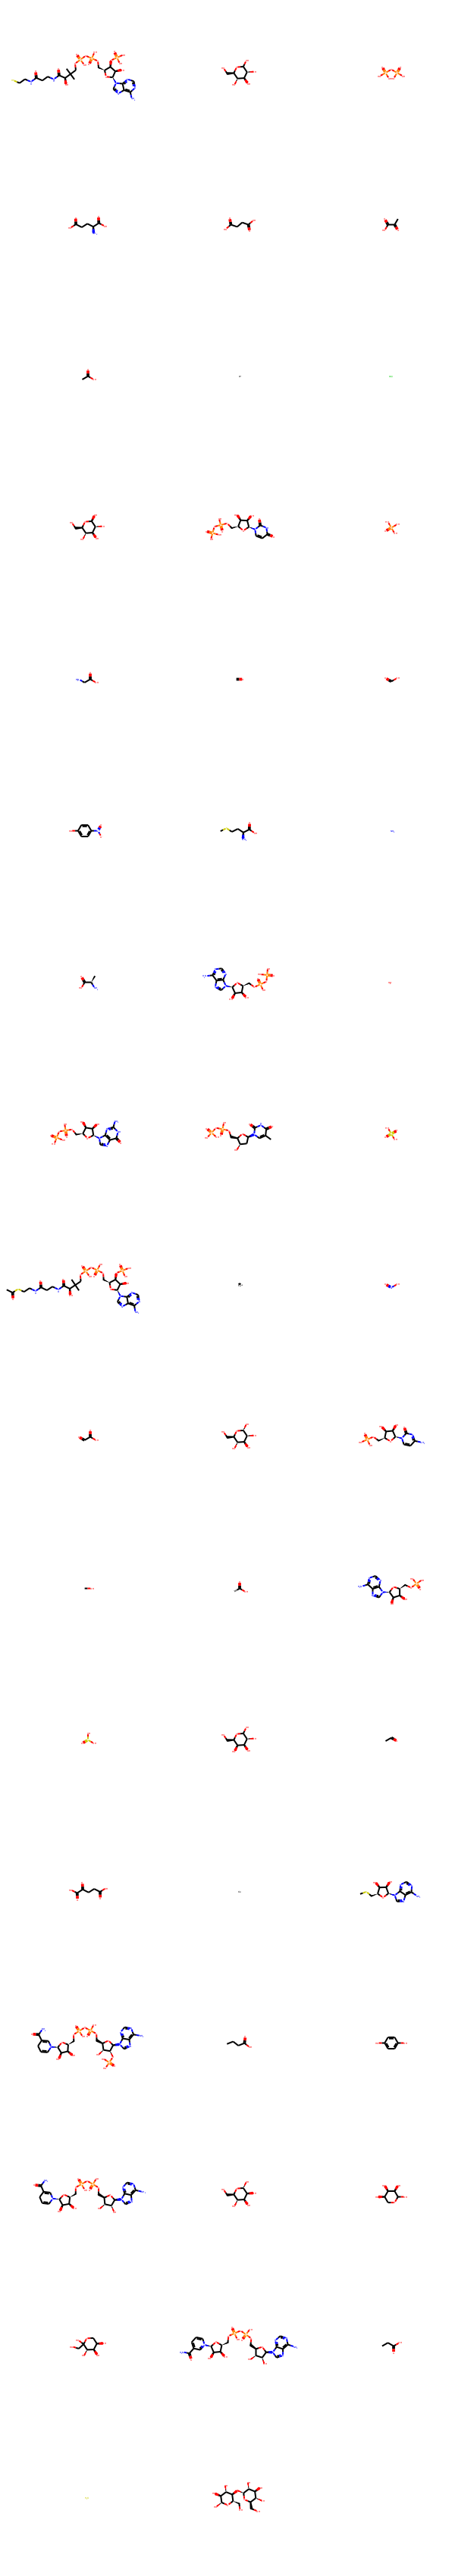

In [14]:
# molecules that most frequently co-appear with other molecules on the products side 
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in sorted_appear_twice][:50])

In [15]:
mols_to_remove_from_reactions_with_multiple_products = list(sorted_appear_twice.keys())

coa_patt_smiles = 'CC(C)(COP(=O)(O)OP(=O)(O)OCC1C(C(C(O1)N2C=NC3=C(N=CN=C32)N)O)OP(=O)(O)O)C(C(=O)NC)O' #pattern for coa attached to an atom
coa_patt_mol = Chem.MolFromSmiles(coa_patt_smiles)
molecules_to_remove = [Chem.MolFromSmiles(smiles) for smiles in mols_to_remove_from_reactions_with_multiple_products]
# Chem.Draw.MolsToGridImage(molecules_to_remove)

In [16]:
len(molecules_to_remove)

383

In [17]:
bkms_plus_rev = bkms_plus_rev.dropna(subset= ['mapped_smiles'])
bkms_plus_rev = bkms_plus_rev[bkms_plus_rev['mapped_smiles'].map(lambda x : len(x.split('>'))==3)]
rxns_w_multiple_products = bkms_plus_rev[bkms_plus_rev['mapped_smiles'].map(lambda x : len(x.split('>')[2].split('.')) > 1)]


bkms_plus_rev = bkms_plus_rev.drop(index=rxns_w_multiple_products.index)

In [18]:
# iteratively remove the most commonly appearing second products until all reactions have a single product
for molecule in molecules_to_remove:
    if molecule:
        print ('Removing {}'.format(Chem.MolToSmiles(molecule)))
        rxns_w_multiple_products = rxns_w_multiple_products.dropna(subset=['mapped_smiles'])
        rxns_w_multiple_products['mapped_smiles'] = rxns_w_multiple_products['mapped_smiles'].map(lambda x : 
                                remove_molecule_from_reactants_and_products(molecule, x, products_only=True))
        
        #recovered reactions with one product
        molecules_w_one_product = rxns_w_multiple_products[rxns_w_multiple_products['mapped_smiles'].map(lambda x : len(x.split('>')[2].split('.')) == 1)]
        print(len(molecules_w_one_product)) 
        
        rxns_w_multiple_products = rxns_w_multiple_products.drop(index=molecules_w_one_product.index)
        bkms_plus_rev = bkms_plus_rev.append(molecules_w_one_product)

Removing CC(C)(COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C@@H]1OP(=O)(O)O)[C@@H](O)C(=O)NCCC(=O)NCCS
881
Removing OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O
366
Removing O=P(O)(O)OP(=O)(O)O
151
Removing N[C@@H](CCC(=O)O)C(=O)O
187
Removing O=C(O)CCC(=O)O
239
Removing CC(=O)C(=O)O
162
Removing CC(=O)O
168
Removing [H+]
11
Removing Cl
156
Removing OC[C@H]1O[C@@H](O)[C@H](O)[C@@H](O)[C@@H]1O
0
Removing O=c1ccn([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O)[C@@H](O)[C@H]2O)c(=O)[nH]1
120
Removing O=P(O)(O)O
81
Removing NCC(=O)O
71
Removing C=O
78
Removing O=CO
99
Removing O=[N+]([O-])c1ccc(O)cc1
15
Removing CSCC[C@H](N)C(=O)O
55
Removing N
68
Removing C[C@H](N)C(=O)O
76
Removing Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O)O)[C@@H](O)[C@H]1O
26
Removing O
17
Removing Nc1nc2c(ncn2[C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O)[C@@H](O)[C@H]2O)c(=O)[nH]1
63
Removing Cc1cn([C@H]2C[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)O)O2)c(=O)[nH]c1=O
72
Removing O=S(=O)(O)O
57
Removing CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)

0
Removing NCCCN
6
Removing O=Cc1ccccc1
1
Removing CC(C)C(=O)C(=O)O
2
Removing NCCCC=O
0
Removing C=CC1=C(C)C2=Cc3c(C=C)c(C)c4n3[Fe+2]35n6c(c(C)c(CCC(C)=O)c6=CC6=[N+]3C(=C4)C(C)=C6CCC(C)=O)=CC1=[N+]25
0
Removing CC(=O)CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C@@H]1OP(=O)(O)O
1
Removing O=[Mn]=O
2
Removing C[N+](C)(C)CCOP(=O)(O)O
2
Removing NCCCC(=O)O
1
Removing O=[N+]([O-])[O-]
4
Removing NCCOP(=O)(O)O
6
Removing Nc1nc2nc[nH]c2c(=O)[nH]1
1
Removing O=C(O)c1ccc(O)c(O)c1
2
Removing OC[C@H]1O[C@H](OC[C@H]2O[C@H](O)[C@H](O)[C@@H](O)[C@H]2O)[C@@H](O)[C@@H](O)[C@@H]1O
6
Removing O=C1O[C@H]([C@H](O)CO)C(=O)C1=O
15
Removing Oc1ccccc1O
4
Removing OC[C@H]1O[C@H](O[C@@H]2[C@@H](CO)O[C@H](O[C@@H]3[C@@H](CO)O[C@H](O[C@@H]4[C@@H](CO)OC(O)[C@H](O)[C@H]4O)[C@H](O)[C@H]3O)[C@H](O)[C@H]2O)[C@H](O)[C@@H](O)[C@@H]1O
4
Removing C=C
2
Removing CC(C)CC(N)C(=O)O
0
Removing NC(N)=NCCC[C@H](N)C(=O)O
3
Removing O=P(O)(O)OC[C@H]1O[C@@H](O)[C@@H](O)C1O
8
Re

0
Removing NC(CCC(=O)NC(CS)C(=O)NCC(=O)O)C(=O)O
0
Removing Cc1ncc(CO)c(C=O)c1O
0
Removing CSC[C@H]1O[C@H](OP(=O)(O)O)[C@H](O)[C@@H]1O
0
Removing N=C(N)N
0
Removing C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CCC2=O
0
Removing F
2
Removing COc1cc(/C=C/C(=O)O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)ccc1O
2
Removing O=P(O)(O)OC[C@H]1OC(O)(COP(=O)(O)O)[C@@H](O)[C@H]1O
0
Removing O=P(O)(O)OC[C@H]1OC(O)[C@@H](O)[C@@H](O)[C@@H]1O
3
Removing OC[C@H]1OC(O[C@@H]2[C@@H](CO)OC(O[C@@H]3[C@@H](CO)O[C@H](O)[C@H](O)[C@H]3O)[C@H](O)[C@H]2O)[C@H](O)[C@@H](O)[C@@H]1O
0
Removing Nc1ncnc2c1ncn2C1OC(COP(=O)(O)O)C(OP(=O)(O)O)C1O
0
Removing C=C(CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C@@H]1OP(=O)(O)O)C(=O)O
0
Removing O=P(O)(O)OC[C@H]1O[C@@H](O)[C@H](O)[C@@H](O)[C@@H]1O
0
Removing NC(=O)O
3
Removing NCCC=O
2
Removing NCCCNCCCN
0
Removing O=O
1
Removing NC(=O)CC(=O)C(=O)O
1
Removing O[C@H]1[C@H](O)CO[C@@H](O)[C@@H]1O
0
Removing O=CCS(=O)(=O)O
1
Removing

In [19]:
bkms_plus_rev_checkpoint = bkms_plus_rev.copy()

In [20]:
bkms_plus_rev = bkms_plus_rev.dropna(subset=['mapped_smiles'])

bkms_plus_rev

,index,Unnamed: 0,ID,EC_Number,Recommended_Name,Reaction,Reaction_ID_BRENDA,Reaction_ID_KEGG,Reaction_ID_MetaCyc,Reaction_ID_SABIO_RK,...,MetaCyc_Pathway_Name,Stoichiometry_Check,Missing_Substrate,Missing_Product,Commentary_KEGG,Commentary_MetaCyc,Remark,smiles,num products,mapped_smiles
0,0,0,1,5.3.3.3,vinylacetyl-CoA DELTA-isomerase,vinylacetyl-CoA = (E)-but-2-enoyl-CoA,BR1,R03031,VINYLACETYL-COA-DELTA-ISOMERASE-RXN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,natural substrates,C=CCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=...,1,[O:1]=[C:2]([S:3][CH2:4][CH2:5][NH:6][C:7](=[...
1,1,1,2,6.3.2.1,pantoate-beta-alanine ligase (AMP-forming),ATP + (R)-pantoate + beta-alanine = AMP + diph...,BR101,R02473,PANTOATE-BETA-ALANINE-LIG-RXN,2406,...,phosphopantothenate biosynthesis I,NaN,NaN,NaN,NaN,NaN,natural substrates,CC(C)(CO)[C@@H](O)C(=O)O.NCCC(=O)O>>CC(C)(CO)[...,1,[O:1]=[C:2]([OH:16])[C@H:3]([OH:4])[C:5]([CH3...
2,2,2,3,6.3.2.10,UDP-N-acetylmuramoyl-tripeptide-D-alanyl-D-ala...,ATP + UDP-N-acetylmuramoyl-L-alanyl-gamma-D-gl...,BR102,R04573,6.3.2.10-RXN,4244,...,UDP-N-acetylmuramoyl-pentapeptide biosynthesis...,NaN,NaN,NaN,NaN,NaN,natural substrates,CC(=O)N[C@H]1[C@@H](OP(=O)(O)OP(=O)(O)OC[C@H]2...,1,[O:1]=[C:2]([OH:78])[C@@H:3]([NH:4][C:5](=[O:...
4,4,4,5,6.3.2.11,carnosine synthase,ATP + L-histidine + beta-alanine = ADP + phosp...,BR103,R01164,CARNOSINE-SYNTHASE-RXN,NaN,...,carnosine biosynthesis,NaN,NaN,NaN,NaN,NaN,natural substrates,NCCC(=O)O.N[C@@H](Cc1c[nH]cn1)C(=O)O>>NCCC(=O)...,1,[O:1]=[C:2]([OH:3])[C@@H:4]([NH2:5])[CH2:6][c...
5,5,5,6,1.1.3.37,"D-arabinono-1,4-lactone oxidase","D-arabinono-1,4-lactone + O2 = dehydro-D-arabi...",BR1036,R02715,1.1.3.37-RXN,NaN,...,"dehydro-D-arabinono-1,4-lactone biosynthesis",NaN,NaN,NaN,Ref:1. Biochim Biophys Acta 1996; 1297: 1-8,NaN,natural substrates,O=C1O[C@H](CO)[C@@H](O)[C@@H]1O>>O=C1O[C@H](CO...,1,[O:1]=[C:2]1[O:3][C@H:4]([CH2:5][OH:6])[C@@H:...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22416,22416,6756,6757,NaN,NaN,3beta-hydroxy-8'-apo-beta-carotenal + O2 = cro...,BR51176,NaN,RXN-15980,NaN,...,crocetin biosynthesis,NaN,NaN,NaN,NaN,NaN,natural substrates,CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C=C/C=C(C)/C=C/C=...,2,[O:1]=[CH:2]\[C:3](=[CH:4]\[CH:5]=[CH:6]\[C:7...
23098,23098,7562,7563,NaN,NaN,zeaxanthin + O2 = 3beta-hydroxy-8'-apo-beta-ca...,BR52243,NaN,RXN-15979,NaN,...,crocetin biosynthesis,NaN,NaN,NaN,NaN,NaN,natural substrates,CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C=C/C=C(C)/C=C/C=...,2,[OH:1][C@@H:2]1[CH2:3][C:4](=[C:5](\[CH:6]=[C...
21521,21521,5769,5770,2.2.1.11,6-deoxy-5-ketofructose 1-phosphate synthase,2-oxopropanal + D-fructose 1-phosphate = D-gly...,BR50118,NaN,RXN-13144,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,natural substrates,CC(=O)C=O.O=P(O)(O)OCC1(O)OC(CO)C(O)C1O>>CC(=O...,2,[O:1]=[P:2]([OH:3])([OH:4])[O:5][CH2:6][C:7]1...
23878,23878,8427,8428,7.3.2.5,ABC-type molybdate transporter,ATP + H2O + molybdate/out = ADP + phosphate + ...,BS141429,NaN,ABC-19-RXN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,natural substrates,[Mo+6].[O-2].[O-2].[O-2].[O-2]>>[Mo+6].[O-2].[...,5,[Mo+6:1].[O-2:2].[O-2:3].[O-2:4].[O-2:5]>>[Mo...


In [21]:
bkms_plus_rev['mapped_smiles'] = bkms_plus_rev['mapped_smiles'].map(lambda x : unmap_unmatched_products(x))

In [22]:
bkms_plus_rev['mapped_smiles'] = bkms_plus_rev['mapped_smiles'].map(lambda x : unmap_unmatched_reactants(x))

In [23]:
for i in range(1,7):
    print (len(bkms_plus_rev[bkms_plus_rev['mapped_smiles'].map(lambda x : has_poorly_mapped_reactants(str(x), min_mapped=i))]))

1907
2274
2360
2493
2647
2785


In [24]:
bkms_plus_rev[bkms_plus_rev['mapped_smiles'].map(lambda x : has_poorly_mapped_reactants(str(x), min_mapped=i, thresh = 0.15))]

,index,Unnamed: 0,ID,EC_Number,Recommended_Name,Reaction,Reaction_ID_BRENDA,Reaction_ID_KEGG,Reaction_ID_MetaCyc,Reaction_ID_SABIO_RK,...,MetaCyc_Pathway_Name,Stoichiometry_Check,Missing_Substrate,Missing_Product,Commentary_KEGG,Commentary_MetaCyc,Remark,smiles,num products,mapped_smiles
4,4,4,5,6.3.2.11,carnosine synthase,ATP + L-histidine + beta-alanine = ADP + phosp...,BR103,R01164,CARNOSINE-SYNTHASE-RXN,NaN,...,carnosine biosynthesis,NaN,NaN,NaN,NaN,NaN,natural substrates,NCCC(=O)O.N[C@@H](Cc1c[nH]cn1)C(=O)O>>NCCC(=O)...,1,O[C:13](=[O:12])[CH2:14][CH2:15][NH2:16].[O:1]...
12,12,12,13,6.3.2.14,enterobactin synthase,"6 ATP + 3 2,3-dihydroxybenzoate + 3 L-serine =...",BR106,R07644,ENTMULTI-RXN,NaN,...,NaN,NaN,NaN,NaN,multi-step reaction,NaN,"natural substrates, multi-step reaction",N[C@@H](CO)C(=O)O.N[C@@H](CO)C(=O)O.N[C@@H](CO...,1,O[C:12](=[O:11])[c:13]1[cH:14][cH:15][cH:16][c...
92,92,97,98,1.2.1.10,acetaldehyde dehydrogenase (acetylating),butanal + CoA + NADP+ = butanoyl-CoA + NADPH + H+,BR1123,R01173,BUTANAL-DEHYDROGENASE-RXN,1410,...,pyruvate fermentation to butanol II (engineere...,NaN,NaN,NaN,NAD+ (see R01172),NaN,natural substrates,CC(C)(COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc...,1,[O:1]=[C:2]([NH:3][CH2:4][CH2:5][SH:6])[CH2:7]...
218,218,231,232,6.3.2.3,glutathione synthase,ATP + gamma-L-glutamyl-L-cysteine + glycine = ...,BR119,R00497,GLUTATHIONE-SYN-RXN,927,...,glutathione biosynthesis,NaN,NaN,NaN,NaN,NaN,natural substrates,NCC(=O)O.N[C@@H](CCC(=O)N[C@@H](CS)C(=O)O)C(=O...,1,O[C:12]([C@@H:11]([NH:10][C:8]([CH2:7][CH2:6][...
253,253,272,273,6.3.4.12,glutamate-methylamine ligase,ATP + L-glutamate + methylamine = ADP + phosph...,BR133,R01585,GLUTAMATE--METHYLAMINE-LIGASE-RXN,1735,...,methylamine degradation II,NaN,NaN,NaN,NaN,NaN,natural substrates,CN.N[C@@H](CCC(=O)O)C(=O)O>>CNC(=O)CC[C@H](N)C...,1,O[C:2](=[O:1])[CH2:3][CH2:4][C@H:5]([NH2:6])[C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18318,18318,32957,57625,2.4.1.243,6G-fructosyltransferase,1-kestose + 3 sucrose = 3 neokestose + H2O,BS380846,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,natural substrates,OC[C@H]1O[C@H](O[C@]2(CO)O[C@H](CO)[C@@H](O)[C...,3,OC[C@H]1O[C@H](O[C@]2(CO)O[C@H](CO)[C@@H](O)[C...
30799,8642,20410,24654,NaN,NaN,4-Keto-2-undecylpyrroline + 2 H2O + 2 CO2 + Co...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"natural substrates, multi-step reaction",CC(C)(COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc...,2,O=C1C=C(CCCCCCCCC[CH2:1][CH3:2])NC1.[SH:3][CH2...
21521,21521,5769,5770,2.2.1.11,6-deoxy-5-ketofructose 1-phosphate synthase,2-oxopropanal + D-fructose 1-phosphate = D-gly...,BR50118,NaN,RXN-13144,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,natural substrates,CC(=O)C=O.O=P(O)(O)OCC1(O)OC(CO)C(O)C1O>>CC(=O...,2,OCC1O[C:7]([CH2:6][O:5][P:2](=[O:1])([OH:3])[O...
23878,23878,8427,8428,7.3.2.5,ABC-type molybdate transporter,ATP + H2O + molybdate/out = ADP + phosphate + ...,BS141429,NaN,ABC-19-RXN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,natural substrates,[Mo+6].[O-2].[O-2].[O-2].[O-2]>>[Mo+6].[O-2].[...,5,[Mo+6:1].[O-2].[O-2].[O-2].[O-2]>>[Mo+6:1]


In [25]:
bkms_plus_rev['mapped_smiles'] = bkms_plus_rev['mapped_smiles'].map(lambda x :remove_poorly_mapped_reactants(x))

In [26]:
bkms_plus_rev['num_products'] = bkms_plus_rev['mapped_smiles'].map(lambda x : len(x.split('>')[2].split('.')))

In [27]:
bkms_plus_rev = bkms_plus_rev[bkms_plus_rev['smiles'].map(lambda x : not same_products_and_reactants_smiles(x))]
bkms_plus_rev = bkms_plus_rev[bkms_plus_rev['Reaction'].map(lambda x : not same_products_and_reactants_names(x))]

In [28]:
bkms_plus_rev = bkms_plus_rev[bkms_plus_rev['mapped_smiles'].map(lambda x: '*' not in str(x) and '[Rh]' not in str(x))]

In [29]:
bkms_plus_rev

,index,Unnamed: 0,ID,EC_Number,Recommended_Name,Reaction,Reaction_ID_BRENDA,Reaction_ID_KEGG,Reaction_ID_MetaCyc,Reaction_ID_SABIO_RK,...,Stoichiometry_Check,Missing_Substrate,Missing_Product,Commentary_KEGG,Commentary_MetaCyc,Remark,smiles,num products,mapped_smiles,num_products
0,0,0,1,5.3.3.3,vinylacetyl-CoA DELTA-isomerase,vinylacetyl-CoA = (E)-but-2-enoyl-CoA,BR1,R03031,VINYLACETYL-COA-DELTA-ISOMERASE-RXN,NaN,...,NaN,NaN,NaN,NaN,NaN,natural substrates,C=CCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=...,1,[O:1]=[C:2]([S:3][CH2:4][CH2:5][NH:6][C:7](=[O...,1
1,1,1,2,6.3.2.1,pantoate-beta-alanine ligase (AMP-forming),ATP + (R)-pantoate + beta-alanine = AMP + diph...,BR101,R02473,PANTOATE-BETA-ALANINE-LIG-RXN,2406,...,NaN,NaN,NaN,NaN,NaN,natural substrates,CC(C)(CO)[C@@H](O)C(=O)O.NCCC(=O)O>>CC(C)(CO)[...,1,O[C:2](=[O:1])[C@H:3]([OH:4])[C:5]([CH3:6])([C...,1
2,2,2,3,6.3.2.10,UDP-N-acetylmuramoyl-tripeptide-D-alanyl-D-ala...,ATP + UDP-N-acetylmuramoyl-L-alanyl-gamma-D-gl...,BR102,R04573,6.3.2.10-RXN,4244,...,NaN,NaN,NaN,NaN,NaN,natural substrates,CC(=O)N[C@H]1[C@@H](OP(=O)(O)OP(=O)(O)OC[C@H]2...,1,O[C:2](=[O:1])[C@@H:3]([NH:4][C:5](=[O:6])[CH2...,1
4,4,4,5,6.3.2.11,carnosine synthase,ATP + L-histidine + beta-alanine = ADP + phosp...,BR103,R01164,CARNOSINE-SYNTHASE-RXN,NaN,...,NaN,NaN,NaN,NaN,NaN,natural substrates,NCCC(=O)O.N[C@@H](Cc1c[nH]cn1)C(=O)O>>NCCC(=O)...,1,O[C:13](=[O:12])[CH2:14][CH2:15][NH2:16].[O:1]...,1
5,5,5,6,1.1.3.37,"D-arabinono-1,4-lactone oxidase","D-arabinono-1,4-lactone + O2 = dehydro-D-arabi...",BR1036,R02715,1.1.3.37-RXN,NaN,...,NaN,NaN,NaN,Ref:1. Biochim Biophys Acta 1996; 1297: 1-8,NaN,natural substrates,O=C1O[C@H](CO)[C@@H](O)[C@@H]1O>>O=C1O[C@H](CO...,1,[O:1]=[C:2]1[O:3][C@H:4]([CH2:5][OH:6])[C@@H:7...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19859,19859,37189,88565,3.2.1.132,chitosanase,chitopentaose + H2O = chitobiose + chitotriose,BR36954,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,natural substrates,N[C@H]1C(O)O[C@H](CO)[C@@H](O[C@@H]2O[C@H](CO)...,2,N[C@H]1[C@H](O[C@@H]2[C@@H](CO)O[C@@H](O[C@@H]...,1
21075,21075,5258,5259,1.13.11.84,crocetin dialdehyde synthase,zeaxanthin + 2 O2 = crocetin dialdehyde + 2 3b...,"BR49605,BS415792",NaN,RXN-8469,NaN,...,NaN,NaN,NaN,NaN,NaN,"natural substrates, multi-step reaction",CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C=C/C=C(C)/C=C/C=...,3,CC1=C(/C=C/C(C)=C/C=C/[C:12](=[CH:13]/[CH:14]=...,1
22416,22416,6756,6757,NaN,NaN,3beta-hydroxy-8'-apo-beta-carotenal + O2 = cro...,BR51176,NaN,RXN-15980,NaN,...,NaN,NaN,NaN,NaN,NaN,natural substrates,CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C=C/C=C(C)/C=C/C=...,2,CC1=C(/C=[CH:17]/[C:16](=[CH:15]/[CH:14]=[CH:1...,1
23098,23098,7562,7563,NaN,NaN,zeaxanthin + O2 = 3beta-hydroxy-8'-apo-beta-ca...,BR52243,NaN,RXN-15979,NaN,...,NaN,NaN,NaN,NaN,NaN,natural substrates,CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C=C/C=C(C)/C=C/C=...,2,CC1(C)C[C@H](O)C[C:4]([CH3:42])=[C:5]1/[CH:6]=...,1


<AxesSubplot:>

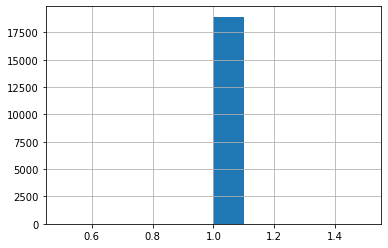

In [30]:
bkms_plus_rev['num_products'].hist()

In [31]:
bkms_plus_rev.dropna(subset=['mapped_smiles']).to_csv('../../data/processed_bkms_database/bkms-mapped-cleaned.txt', sep='\t')